In [29]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

import pandas as pd
from pandas import merge

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Open data
data_wt = pd.read_csv('/path_drive/Rates_and_all_data_without05_WT.txt', header=0, delimiter="\t")
data_tko = pd.read_csv('/path_drive/Rates_and_all_data_without05_TKO.txt', header=0,delimiter="\t")



In [25]:
# Function for removing outliers in each column (variable)

def remove_outliers_bis(arr, k):
    mask = np.ones((arr.shape[0],), dtype=np.bool)
    mu, sigma = np.mean(arr, axis=0), np.std(arr, axis=0, ddof=1)
    
    for j in range(arr.shape[1]):
      col = arr[:, j]
      mask[mask] &= np.abs((col[mask] - mu[j]) / sigma[j]) < k
    
    return arr[mask]


In [30]:
# Extract features from columns and remove header
#0 Gene_name	
#1 Chr	
#2 Start	
#3 End	
#4 Strand	
#5 meRIP	
#6 RNAPII_GB	
#7 RNAPII_PR	
#8 PausIndex	
#9 cheRNA	
#10 Elongation_rate	

#5 meRIP	
#6 RNAPII_GB	
#7 RNAPII_PR	
#9 cheRNA	
#10 Elongation_rate	
X_wt_all = data_wt.values[:, (5,7,6,9)].astype(np.float)
X_tko_all = data_tko.values[:, (5,7,6,9)].astype(np.float)

X_wt_outliers_all = remove_outliers_bis(X_wt_all,2)
X_tko_outliers_all = remove_outliers_bis(X_tko_all,2)


In [27]:
# Log transform of the data
X_wt_outliers_all[:,0] = np.log(X_wt_outliers_all[:,0]+1)
X_tko_outliers_all[:,0] = np.log(X_tko_outliers_all[:,0]+1)

In [28]:
# Scaler data from 0 to 1
scaler_wt = MinMaxScaler()
scaler_wt.fit(X_wt_outliers_all)
X_wt_scaled = scaler_wt.transform(X_wt_outliers_all)

scaler_wt = MinMaxScaler()
scaler_wt.fit(X_tko_outliers_all)
X_tko_scaled = scaler_wt.transform(X_tko_outliers_all)

print(X_wt_outliers_all.shape)
print(X_tko_outliers_all.shape)

names = ["meRIP", "RNAPII\nPR", "RNAPII\nGB","cheRNAs"]
wt = X_wt_scaled[X_wt_scaled[:,-1].argsort()]
tko = X_tko_scaled[X_tko_scaled[:,-1].argsort()]


(5028, 4)
(5080, 4)


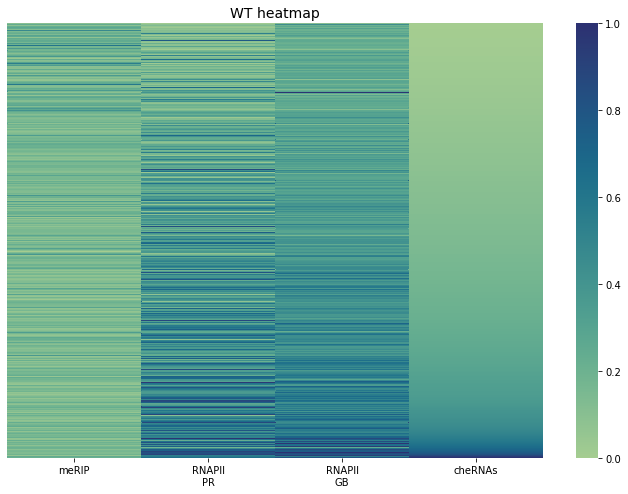

In [23]:
# Plot heatmap for WT

plt.figure(figsize=(12,8))
sn.heatmap(wt, xticklabels=names, vmin=0,vmax=1,cmap="crest",yticklabels=False)
plt.title('WT heatmap',fontsize=14)
plt.show()

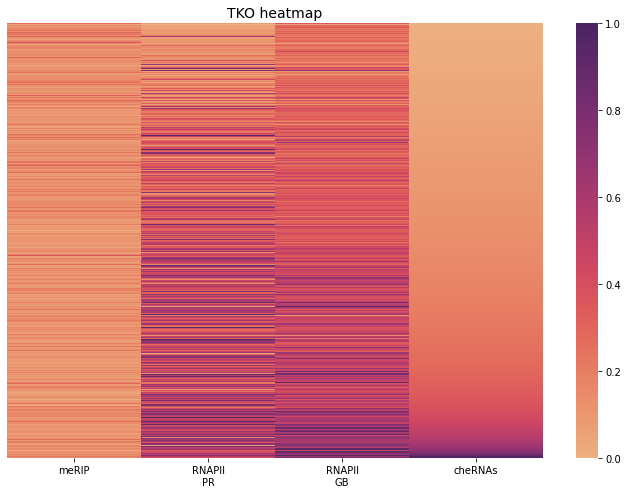

In [24]:
# Plot heatmap for TKO

plt.figure(figsize=(12,8))
sn.heatmap(tko, xticklabels=names, vmin=0,vmax=1,cmap="flare",yticklabels=False)
plt.title('TKO heatmap',fontsize=14)
plt.show()